In [1]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 21.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 45.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 158.5 MB/s eta 0:00:00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# 首先创建mask
mask = np.zeros((721, 1440), dtype=np.float32)

# 新疆边界
lat_min, lat_max = 34, 49
lon_min, lon_max = 73, 96

# 转换为数组索引
lat_idx_min = int((90 - lat_max) * 4)
lat_idx_max = int((90 - lat_min) * 4)
lon_idx_min = int(lon_min * 4)
lon_idx_max = int(lon_max * 4)

# 设置新疆区域为1
mask[lat_idx_min:lat_idx_max+1, lon_idx_min:lon_idx_max+1] = 1

np.save('custom_mask.npy', mask)

In [3]:
mask.sum()

5673.0

In [4]:
mask.shape[0]*mask.shape[1]

1038240

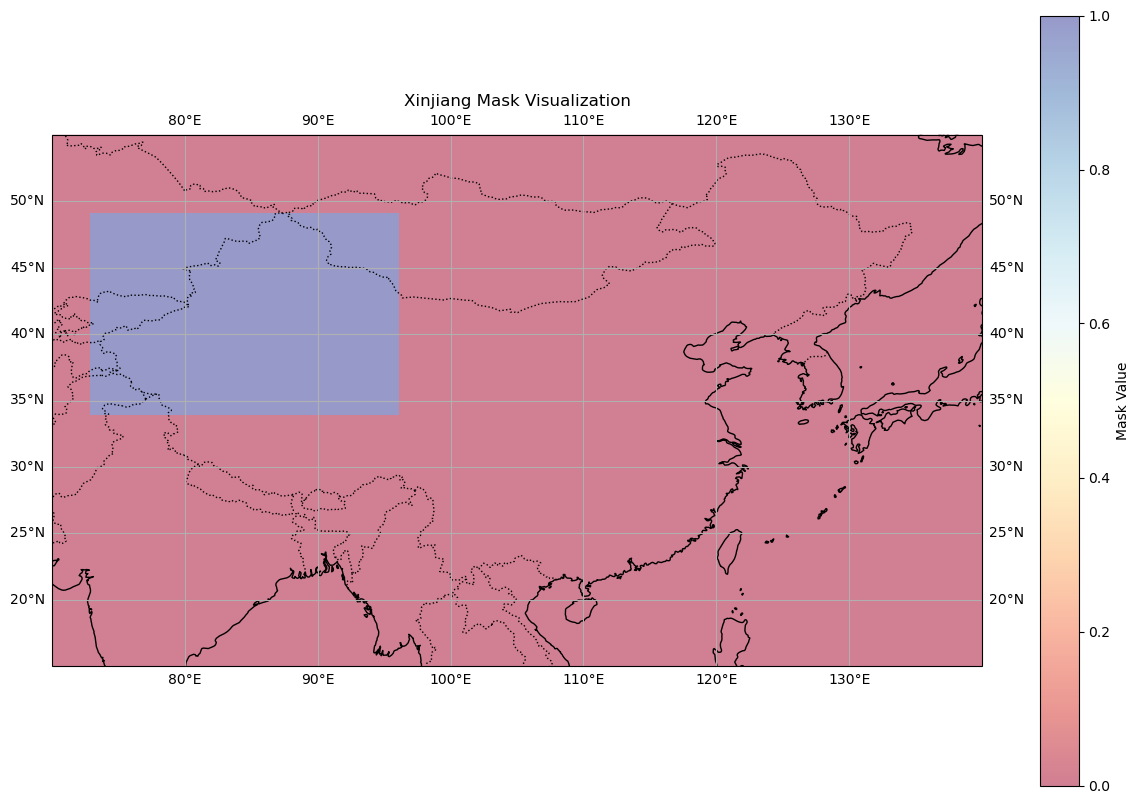

In [6]:
# 创建经纬度网格
lons = np.linspace(0, 359.75, 1440)
lats = np.linspace(90, -90, 721)
lon_mesh, lat_mesh = np.meshgrid(lons, lats)

# 创建地图
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# 设置地图范围（放大到中国区域）
ax.set_extent([70, 140, 15, 55], crs=ccrs.PlateCarree())

# 添加海岸线和国界
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# 绘制mask
plt.pcolormesh(lon_mesh, lat_mesh, mask, 
               transform=ccrs.PlateCarree(),
               cmap='RdYlBu',
               alpha=0.5)

# 添加经纬度网格
ax.gridlines(draw_labels=True)

# 添加标题
plt.title('Xinjiang Mask Visualization')

# 添加colorbar
plt.colorbar(label='Mask Value')

plt.show()